# Runbooks++

Even when we do documentation, it's pretty horrible to use.

Let's see how Jupyter Notebooks can make documentation and runbooks a _lot_ easier.

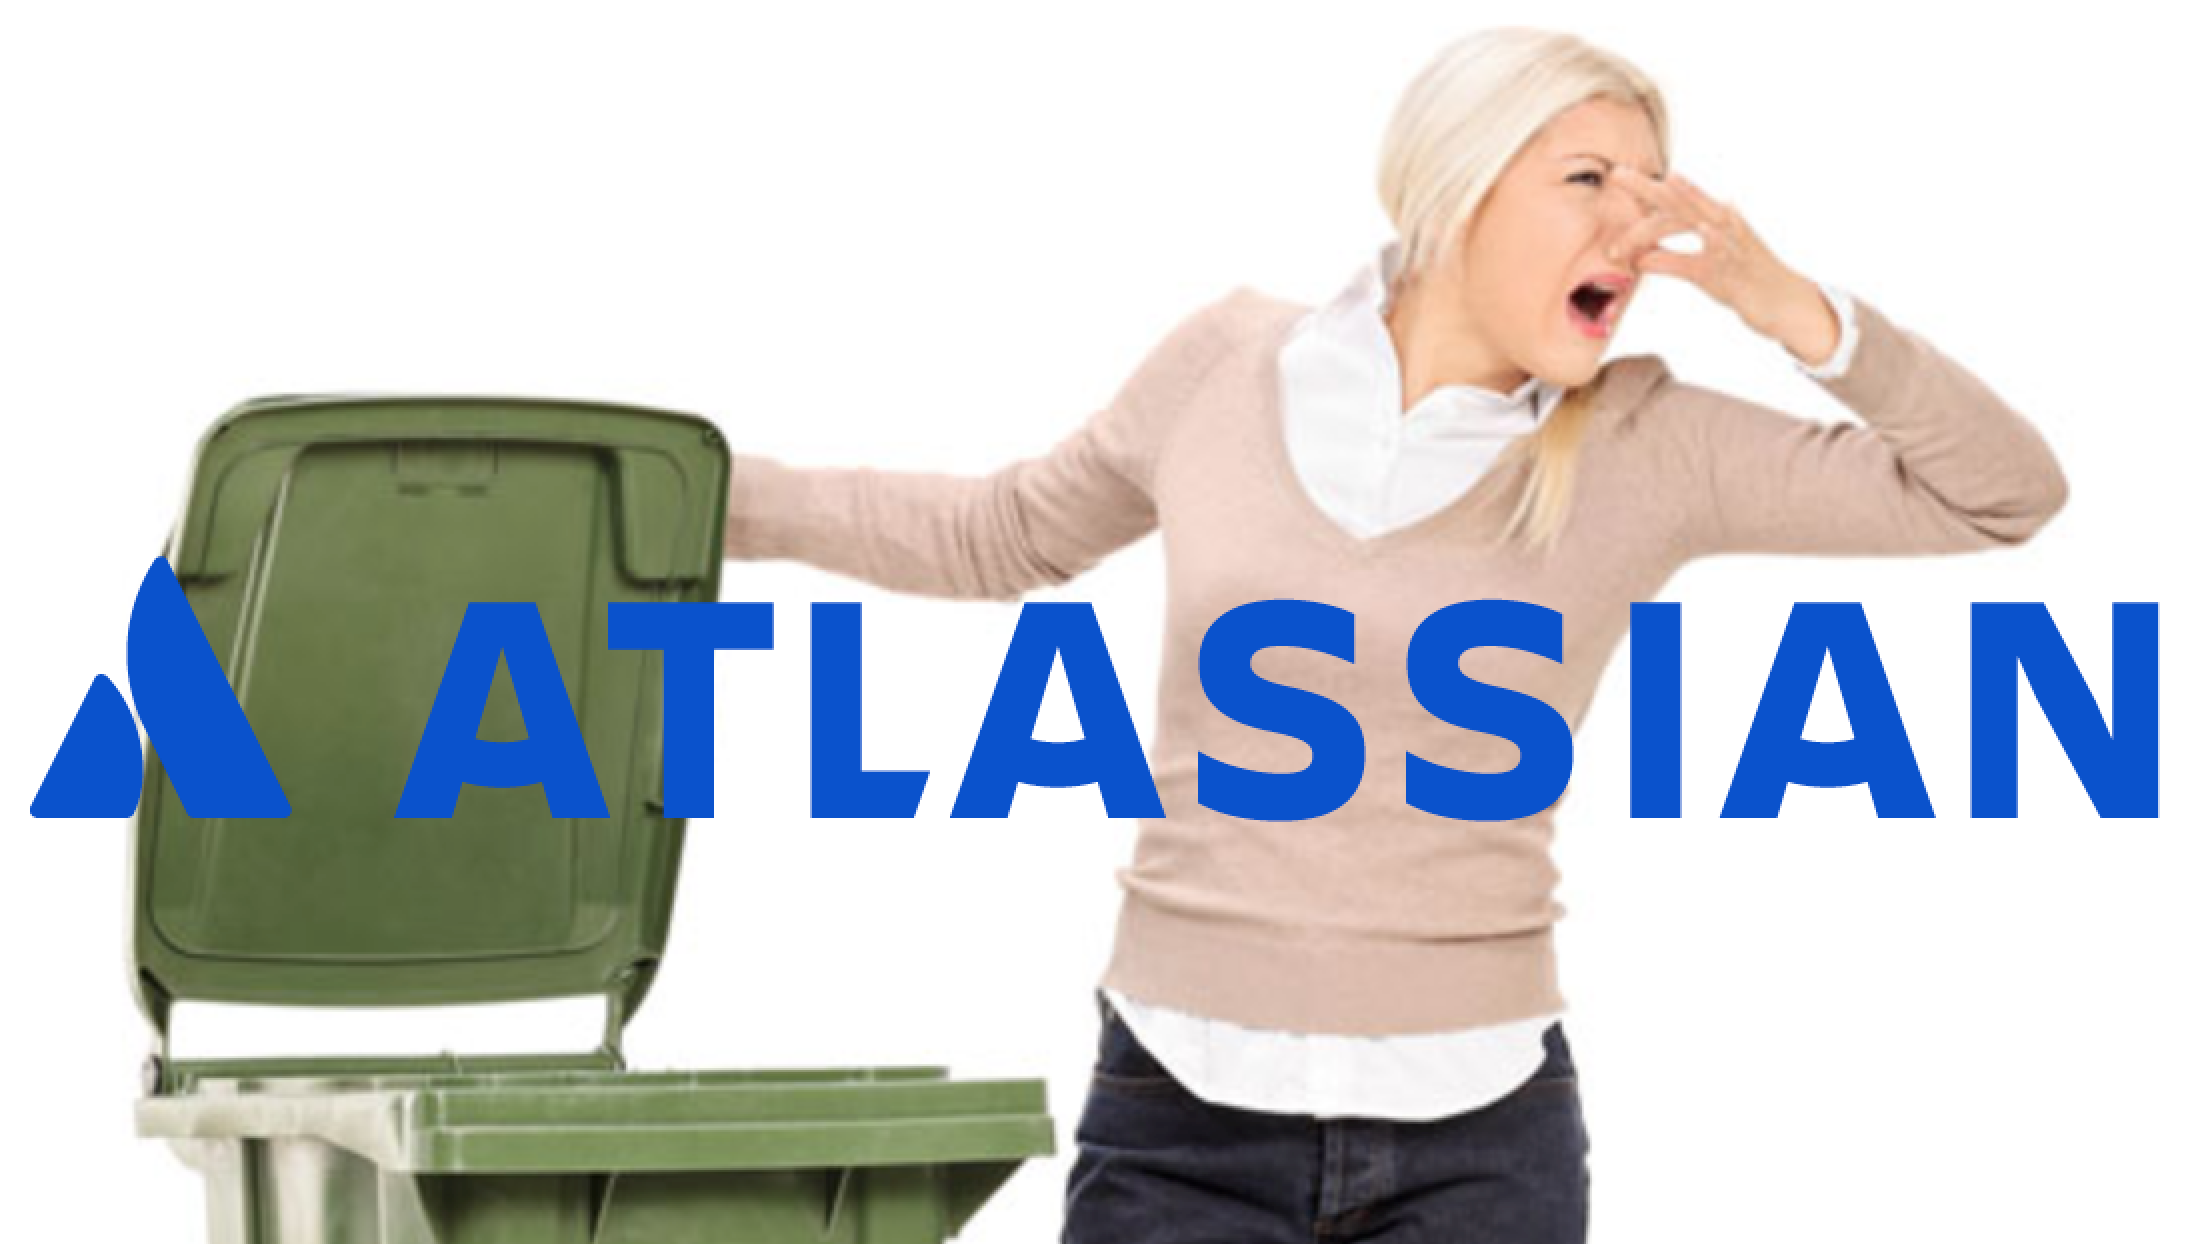





Here's a middling example of documenation - https://CENSORED/Tech+Docs+Docker

## Wouldn't it be cool if the experience were more tailored to you?
If you could run the installation directly from the documentation - and you had a record of all the stuff that you tried?

Let's see some examples of how this would suck less...

## Step 1 - do we need to install Docker?

First, let's look at the prereqs:
```
Install
Install Docker First
See Tech Docs: Docker for instructions
```

We can actually do this check for the user, and provide feedback - instead of having a useless step clutter up our docs. 

Note that this can be hidden from the user so they don't see the mess I've created... this is just to illustrate what we can do.

In [ ]:
%%bash

which docker

if [ $? -eq 0 ]
then
    docker --version | grep "Docker version"
    if [ $? -eq 0 ]
    then
        echo "Docker is installed, continue to step #2"
        # next step / bonus points: set a variable to hide the remaining steps...
    else
        echo "Please install docker - see https://CENSORED/Tech+Docs+Docker"
        # next step / bonus points: load in the notebook to do the installation!
    fi
else
    echo "Please install docker- see https://CENSORED/Tech+Docs+Docker" >&2
fi

## Step 2 - OS-specific install. now with less work!


The next step involves picking a single line cURL command depending on your OS:

```
Install Minikube
This guide parallels the official technique for installation of minikube, copied from https://github.com/kubernetes/minikube/releases

Homebrew based installation on Mac OSX is not suggested at this time.

Mac OSX
curl -Lo minikube https://storage.googleapis.com/minikube/releases/v0.24.1/minikube-darwin-amd64 && chmod +x minikube && sudo mv minikube /usr/local/bin/
Linux
curl -Lo minikube https://storage.googleapis.com/minikube/releases/v0.24.1/minikube-linux-amd64 && chmod +x minikube && sudo mv minikube /usr/local/bin/
```

Look at what we can do! We pick the right thing to do, and we make it possible for you to execute the correct command in the next cell.

Of course, we can hide all of this - but i want to show you so you can see how cool this is!

In [ ]:
%%bash --out out --err err

unameOut="$(uname -s)"
case "${unameOut}" in
    Linux*)     machine=Linux;;
    Darwin*)    machine=Mac;;
    CYGWIN*)    machine=Cygwin;;
    MINGW*)     machine=MinGw;;
    *)          machine="UNKNOWN:${unameOut}"
esac

echo ${machine}

In [ ]:
# Now we can shift back over to Python, because that's totally dope!
# If you execute this cell, then we'll do the installation.

host_machine = out.strip(' \t\n\r')
print("I see that you're running a {}\n So, I'll start installing now".format(host_machine))

if host_machine == 'Mac':   
    !curl -Lo minikube https://storage.googleapis.com/minikube/releases/v0.24.1/minikube-darwin-amd64 && chmod +x minikube && sudo mv minikube /usr/local/bin/
## Whatever cases we want to handle now....
# elif host_machine = 'Linux':
#     !"curl -Lo minikube https://storage.googleapis.com/minikube/releases/v0.24.1/minikube-linux-amd64 && chmod +x minikube && sudo mv minikube /usr/local/bin/"
else:
    print("You are using an inferior OS that won't work. Go find another job.")
    

## Step 3 - Use UI elements to disambiguate running Minikube

We're going to ignore the AMP install specifics, but I'm sure by now you've picked up that we can check if it's necessary and direct you to the correct way to do things.

Let's say you've done that installation. 

It's not explicit in the docs where you're supposed to run the command to start minikube.
Maybe you've got both repos, so you have two directories. Maybe you just are a forgetful young parent like me, and you're having to pick up where you left off.

is it in:
```
  ~/shared-tools
```
or
```
  ~/build-and-deployment-tools
```
or did you put it somewhere unusual?

## UI FTW!
We can try a couple of methods to get this information. Either:
* ask them directly in the UI
* save/load the information from a datastore
* auto-detect it

You can see how this pattern could have been used to get the user's OS from them.

So, let's tell the docs how to find our repo.


In [1]:
import ipywidgets as widgets
from IPython.display import display

repo = widgets.Text(
    value='~/build-and-deployment-tools',
    placeholder='~/build-and-deployment-tools',
    description='repo?',
    disabled=False
)

display(repo)

button = widgets.Button(description="Run Minikube")
display(button)

def on_button_clicked(b):
    #let's assume you haven't actually followed the steps.
    location = "i would be running minikube here {}".format(repo.value)
    !echo $location
    
    # but they'd be something like this
    #!cd $location
    #!./minikubecfg start
    

button.on_click(on_button_clicked)

Text(value='~/build-and-deployment-tools', description='repo?', placeholder='~/build-and-deployment-tools')

Button(description='Run Minikube', style=ButtonStyle())

# Extras - mixing bash and python!

Did you notice that I mixed bash and python really cleanly?!?!
Here's another more obvious example from this [totally ill blog post](https://www.safaribooksonline.com/blog/2014/02/12/using-shell-commands-effectively-ipython/)


In [ ]:
google_a=!dig A www.google.com
google_a.grep('^www').fields(-1).s


In [ ]:
# and then you can print the output of the prior cell!
print(_)